
<div dir = rtl>
توضیحات این بخش، مشابه با بخش قبل خواهد بود. به علت تغییر آستانه‌های کنترل 
پذیرش و افزایش سرعت، با نتایج متفاوتی مواجه خواهیم شد که در ادامه به بیان آن‌ها خواهیم پرداخت.
</div>

In [ ]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics

In [ ]:
lambda_L = 50
lambda_H = 78
mu_L = 0.2
mu_H = 0.2857
N = 400
n = 0 
new_time = 0 
n_A = 0
n_D = 0
arrival_time_list = []
departure_time_list = []
n_list = []
time_list = []
na = 450
ns = 450

In [ ]:
servers = []
for _ in range(N):
    servers.append(0)

In [ ]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]


In [ ]:
for _ in range (100000): 
    
    
    if n < na and n <ns:
        
        lambda_ = lambda_H
        mu_ = mu_L
        
        
    elif n > na and n > ns:
        
        lambda_ = lambda_L
        mu_ = mu_H
        
        
    elif n < ns and n > na :
        
        lambda_ = lambda_L
        mu_ = mu_L
        
    elif n > ns and n < na:
        
        lambda_ = lambda_H
        mu_ = mu_H
        
    
    
    
    time = np.random.exponential(1/((n*mu_)+ lambda_))
    #print(time)
    new_time += time
    time_list.append(new_time)
    print(new_time)

    probability_of_arrival = lambda_ / ((n*mu_)+ lambda_)
    probability_of_departure = (n*mu_) / ((n*mu_)+ lambda_)
    events = ["arrival","departure"]
    distributions = [probability_of_arrival,probability_of_departure]
    random_events = np.random.choice(events, 1, True, distributions)
    #print(random_events)

    if random_events == "arrival":
        n += 1
        n_A += 1
        arrival_time = new_time
        arrival_time_list.append(arrival_time)
        servers.sort()
        servers[0] += 1

    elif random_events == "departure":

        n -= 1
        n_D += 1
        departure_time = new_time
        departure_time_list.append(departure_time)
        number_of_empty_servers = servers.count(0)
        alternative_servers = remove_values_from_list(servers,0)
        random_index = random.randint(0,len(alternative_servers)-1)
        alternative_servers[random_index] -= 1
        for _ in range(number_of_empty_servers):
            alternative_servers.append(0)
        servers = alternative_servers
        
    #print(n)
    n_list.append(n)
    
        
    new_time = time


Streaming output truncated to the last 5000 lines.
0.0228604825560756
0.017642947197079456
0.00261672682308375
0.011186188515897009
0.016939915663774
0.014785465085074324
0.010693687462880424
0.020762345551360032
0.025014160877033703
0.015957815307333683
0.015004134947053186
0.008498605072017574
0.0017385350236305127
0.011527013838013678
0.014849450598907412
0.005515944411560645
0.0031035742645001982
0.0018388254757927334
0.00074937135687325
0.004114287674953577
0.004390832635922696
0.005845406195839704
0.0176062395752088
0.015128568182324813
0.002794685339258791
0.0006249863326729938
0.0005558819382158387
0.013289507649655342
0.02072050416622805
0.00793308808624563
0.004468335746767058
0.012243708388744083
0.009533976450842013
0.002226582114579069
0.014327836416552338
0.01406219827478606
0.013596658025826802
0.018013795072310906
0.00918466517167183
0.006253138986254486
0.004554668085407591
0.018834222112498973
0.022067980663099486
0.018873170009219942
0.021880696468648007
0.0111430241

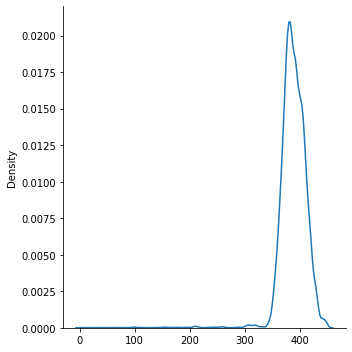

In [ ]:
sns.displot(n_list,kind="kde")

In [ ]:
i_list = []
for i in n_list:
    count = n_list.count(i)
    i_list.append(count)

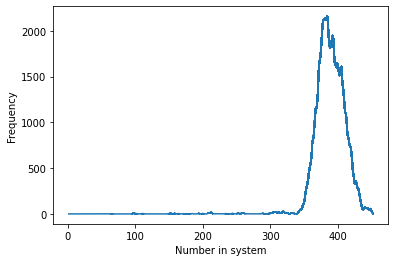

In [ ]:
plt.plot(n_list ,i_list)
plt.xlabel("Number in system")
plt.ylabel("Frequency")
plt.show()  

<div dir =rtl>
همان‌طور که دیدیم؛ توزیع تعداد مشتری‌ها مشابه با توزیع نرمالی خواهد بود که دارای چولگی می‌باشد و تقطیع نیز شده است.
</div>

In [ ]:
# E (X - N) +
element_list = []
for element in n_list:
    ele  = max(0,element - N)
    element_list.append(ele)
print(statistics.mean(element_list))
print(statistics.mean(element_list) / math.sqrt(N) )
print(statistics.mean(element_list) / N)

3.63877
0.1819385
0.009096925


In [ ]:
main_len = len(element_list)

In [ ]:
element_list.sort()
num = element_list.count(0)
for _ in range(num):
    element_list.remove(element_list[0])
    
secondary_len = len(element_list)

In [ ]:
probability_of_wait = secondary_len / main_len

In [ ]:
probability_of_wait

0.28564

In [ ]:
larger_elements = [element for element in n_list if element > na]
number_of_elements = len(larger_elements)
probability_of_admission_control = number_of_elements / len(n_list)
print(probability_of_admission_control)

0.00017


In [ ]:
larger_elements = [element for element in n_list if element > ns]
number_of_elements = len(larger_elements)
probability_of_speedup = number_of_elements / len(n_list)
print(probability_of_speedup)

0.00017


<div dir = rtl>
با توجه به نتایج حاصل شده، احتمال کنترل پذیرش و افزایش سرعت به علت افزایش قابل توجه آستانه‌های مربوطه به شدت کاهش پیدا کرده است. همچنین امید ریاضی طول صف و احتمال انتظار بیماران نیز به علت افزایش مقادیر آستانه‌ها، کاهش پیدا کرده است.
</div>